In [1]:
# input models
import matplotlib.pyplot as plt
import numpy as np 
import os
import cv2

In [2]:
def plt_show(img):
    plt.imshow(img, cmap='gray')
    plt.show()


def read_directory(directory_name):
    face_addr = []
    for filename in os.listdir(directory_name):
        face_addr.append(directory_name + "\\" + filename)
    return face_addr

# 读取指定文件夹下的人脸数据，返回faces列表，列表中每个元素是人脸图片的目录地址
def read_all_faces(pic_dir):
    faces = []
    for i in range(1, 41):
        faces_addr = read_directory(pic_dir + '\\s' + str(i))
        for addr in faces_addr:
            faces.append(addr)
    return faces

将400张人脸读入images列表，并将同一个人的脸打上同一个标签

400
400
<class 'numpy.ndarray'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 2

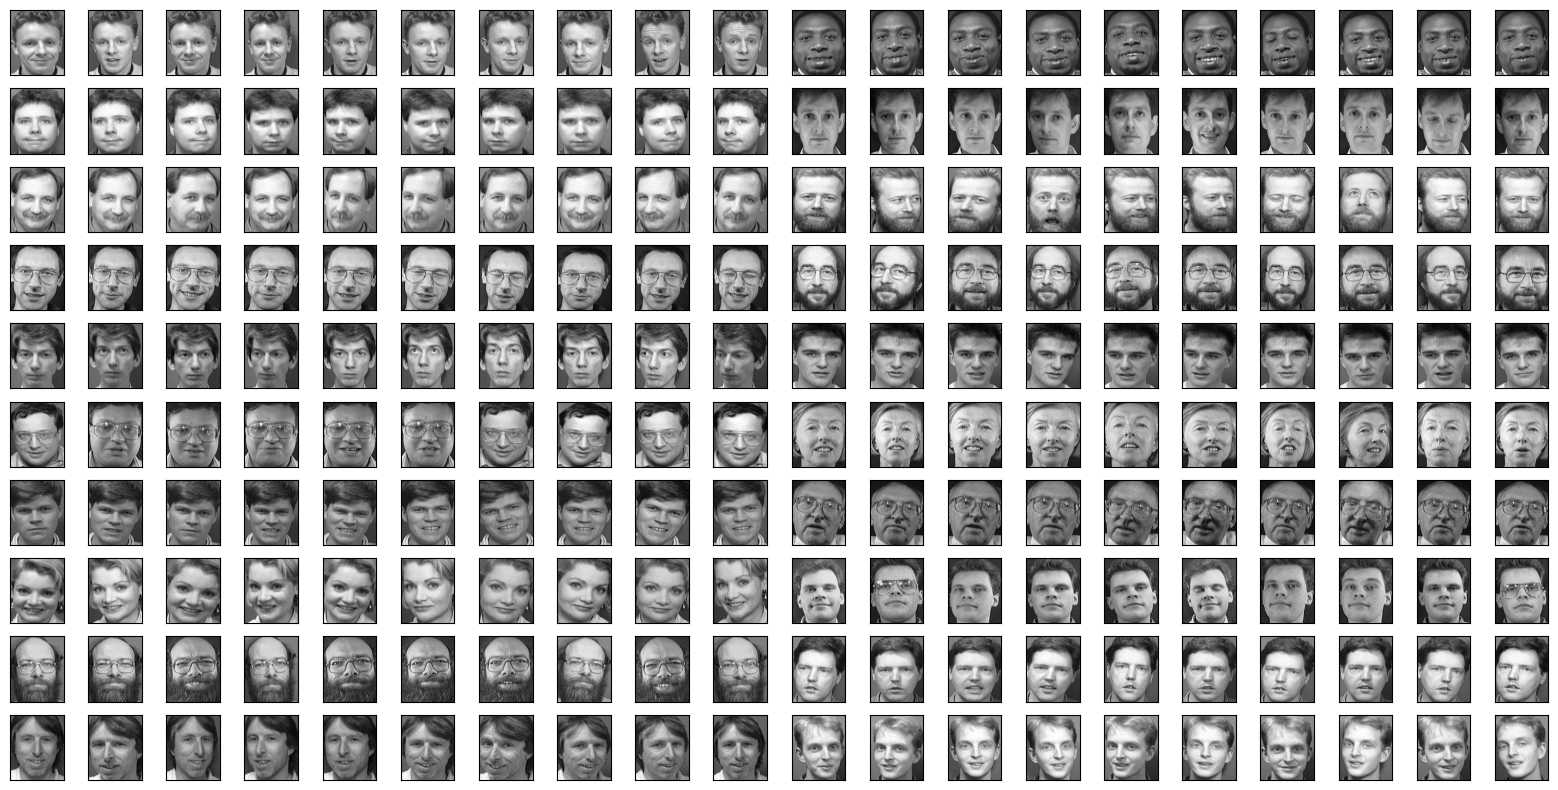

In [3]:
pic_dir = "E:\\03projects\\10MLProject\\50Data\\The_ORL_Database_Of_Faces"
faces = read_all_faces(pic_dir)
# print(faces[1])
# images列表存储图片信息，labels列表存储图片对应的标签，同一个人对应同一个标签，不同人标签不同
images = []
labels = []
for index, face in enumerate(faces):
    image = cv2.imread(face, 0)
    images.append(image)
    labels.append(int(index/10 + 1))
print(len(labels))
print(len(images))
print(type(images[0]))
print(labels)
print(images[0].shape)
# 展示后200张图片，总共有400张图片
fig, axes = plt.subplots(10, 20, figsize=(20, 10), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i+200], cmap='gray')
plt.show()

将112*92的人脸数据平铺展开为1*10304的数据，并将所有人脸数据组合成一个np.array类型的大矩阵

In [4]:
import pandas as pd
image_data = []
# 将人脸数据
for image in images:
    data = image.flatten()
    image_data.append(data)
print(image_data[0].shape)

X = np.array(image_data)
y = np.array(labels)
print(X.shape)

data = pd.DataFrame(X)
print(data.head())

(10304,)
(400, 10304)
   0      1      2      3      4      5      6      7      8      9      ...  \
0     48     49     45     47     49     57     39     42     53     49  ...   
1     34     34     33     32     38     40     39     49     54     57  ...   
2     60     60     62     53     48     51     61     60     71     68  ...   
3     39     44     53     37     61     48     61     45     35     40  ...   
4     63     53     35     36     33     34     31     35     39     43  ...   

   10294  10295  10296  10297  10298  10299  10300  10301  10302  10303  
0     39     44     40     41     49     42     44     47     46     46  
1     42     44     38     30     37     30     36     37     40     33  
2     27     35     28     33     31     31     37     32     34     34  
3     23     30     36     32     28     32     31     29     26     29  
4    173    169    166    161    158    169    137     41     10     24  

[5 rows x 10304 columns]


导入PCA，对人脸大矩阵求特征矩阵，并将400张人脸通过这个矩阵进行降维

In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 降维后的维度是100
pca = PCA(n_components=100)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print(x_train_pca.shape)
print(x_test_pca.shape)

(320, 100)
(80, 100)


(100, 10304)


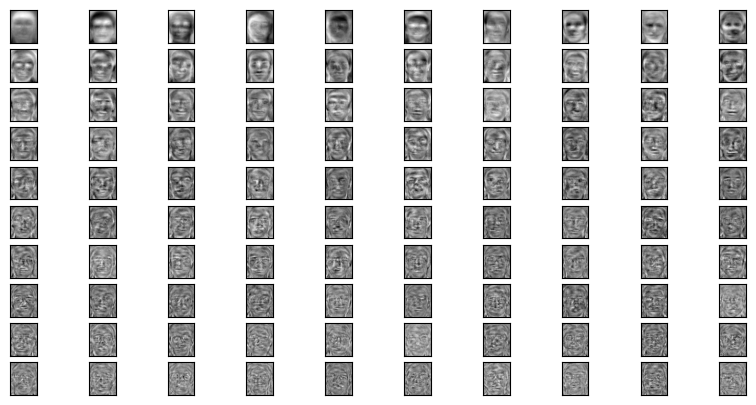

[0.18681526 0.12012867 0.07012078 0.05557682 0.05246274 0.03357098
 0.02434868 0.02410556 0.0191818  0.01886866 0.014898   0.01431232
 0.01170138 0.01075626 0.00986846 0.00944634 0.00889964 0.00836918
 0.00772568 0.00703547 0.00666137 0.00633105 0.00620462 0.0055729
 0.00523765 0.00511178 0.00494127 0.00470031 0.00450978 0.00433736
 0.00409348 0.00405671 0.00397934 0.00369339 0.00368312 0.00354446
 0.00352279 0.00336548 0.00322233 0.00309303 0.00298798 0.00295998
 0.00286571 0.00275027 0.00266689 0.00259947 0.00255351 0.00248808
 0.00247449 0.00245064 0.00231734 0.00227602 0.00225159 0.00220122
 0.00218433 0.00209873 0.00205142 0.00201862 0.0019503  0.00193409
 0.00188774 0.00188034 0.00186327 0.00181363 0.00176479 0.0017176
 0.0016991  0.00166287 0.00165035 0.00161946 0.00159147 0.00158177
 0.00152239 0.00150294 0.00147711 0.00147111 0.00145148 0.00143444
 0.00142086 0.00137209 0.00135158 0.0013361  0.00132659 0.00131022
 0.00126836 0.00124235 0.00121909 0.00120334 0.00119319 0.001178

In [6]:
V = pca.components_
print(V.shape)
# 可视化特征脸
fig, axes = plt.subplots(10, 10, figsize=(10, 5), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i, :].reshape(112, 92), cmap="gray")
plt.show()
# 输出特征脸所占信息比例
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

打印不同特征向量个数所占的信息量

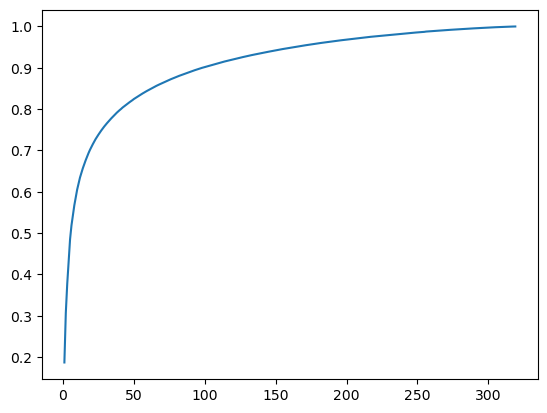

In [9]:
explained_variance_ratio_ = []
for i in range(1, 320):
    pca = PCA(n_components=i).fit(x_train)
    explained_variance_ratio_.append(pca.explained_variance_ratio_.sum())
plt.plot(range(1, 320), explained_variance_ratio_)
plt.show()

使用Eigenface训练模型，然后输出预测结果

In [10]:
model = cv2.face.EigenFaceRecognizer_create()
model.train(x_train, y_train)
res = model.predict(x_test[0])
print(res)
print(y_test[0])
res = model.predict(x_test[1])
print(res)
print(y_test[1])

(14, 3325.628829466357)
14
(5, 1099.983269482957)
5


输出测试集中的所有错误预测结果，并输出准确率

In [11]:
ress = []
right = 0
for i in range(len(y_test)):
    res = model.predict(x_test[i])
    if y_test[i] == res[0]:
        right = right + 1
    else:
        print(i)
print('Accuracy of x_test: %.2f' %(right/len(y_test)))

59
66
Accuracy of x_test: 0.97


下面是将全部的样本用于训练模型，然后对人脸添加噪声，查看效果如何

In [12]:
pca = PCA(n_components=100)
pca.fit(X)
X_pca = pca.transform(X)
model = cv2.face.EigenFaceRecognizer_create()
model.train(X_pca, y)

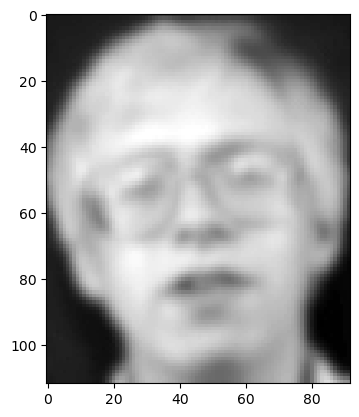

(112, 92)


In [13]:
img = cv2.imread('E:\\03projects\\10MLProject\\50Data\\ORL_test\\17.jpg')
# img = cv2.imread('E:\\03projects\\10MLProject\\50Data\\ORL_test\\ori\\1.pgm')
img = img[:, :, 0]
plt_show(img)
print(img.shape)


In [14]:
imgs = []
imgs.append(img)
image_data = []
for img in imgs:
    data = img.flatten()
    image_data.append(data)
test = np.array(image_data)
print(test.shape)

(1, 10304)


In [15]:
test = pca.transform(test)
print(test[0].shape)

(100,)


In [16]:
res = model.predict(test)
print(res)
print('人脸识别结果: ', res[0])

(2, 3222.4476864200783)
人脸识别结果:  2
